In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

## Loading Data

In [ ]:
dfx = pd.read_csv('LocallyWeightedDataset/weightedX.csv')
dfy = pd.read_csv('LocallyWeightedDataset/weightedY.csv')

In [ ]:
X = dfx.values
y = dfy.values
print(X.shape, y.shape)

In [ ]:
# Normalize the data
u = X.mean()
std = X.std()
X = (X-u)/std

In [ ]:
plt.style.use('seaborn')
plt.scatter(X, y)
plt.show()

## Finding W<sub>m*m</sub> matrix

In [ ]:
def getW(queryPoint, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(M):
        W[i, i] = np.exp(np.dot((X[i]-queryPoint), (X[i]-queryPoint).T)/(-2*tau*tau))
    return W

In [ ]:
X = np.mat(X)
y = np.mat(y)
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

## Making Predictions

In [ ]:
def predict(X, y, queryX, tau):
    ones = np.ones((X.shape[0], 1))
    X_ = np.hstack((ones, X))
    qx = np.mat([1, queryX])
    W = getW(qx, X_, tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*y))
    pred = np.dot(qx, theta)
    # pred = 0
    return pred, theta

In [ ]:
pred, theta = predict(X, y, 1.0, 1.0)
theta

In [ ]:
pred

## Visualize Predictions and Analyze tau

In [50]:
def plotPred(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    for x in X_test:
        pred, theta = predict(X, y, x, tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    X_original = np.array(X)
    Y_original = np.array(y)
    plt.close()
    plt.scatter(X_original, Y_original)
    plt.scatter(X_test, Y_test, color='red')
    plt.title("plot with tau = " + str(tau))
    plt.show()

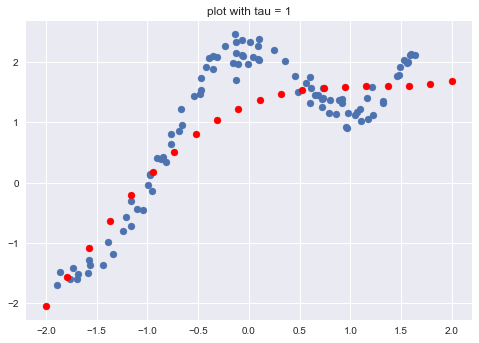

In [51]:
plotPred(1)

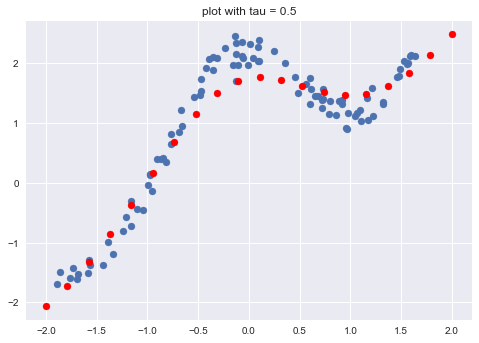

In [52]:
plotPred(0.5)

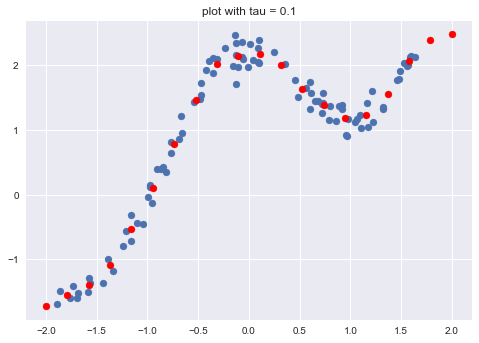

In [53]:
plotPred(0.1)

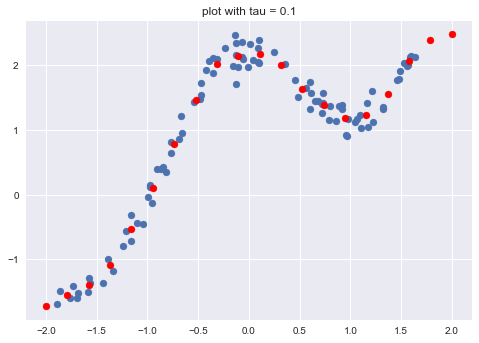

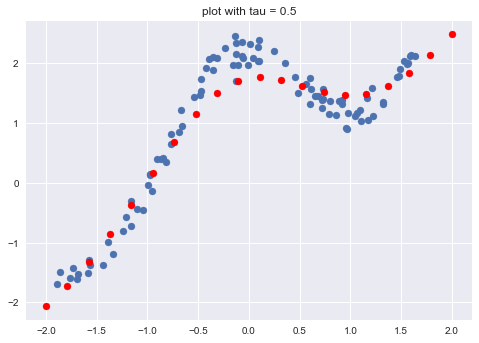

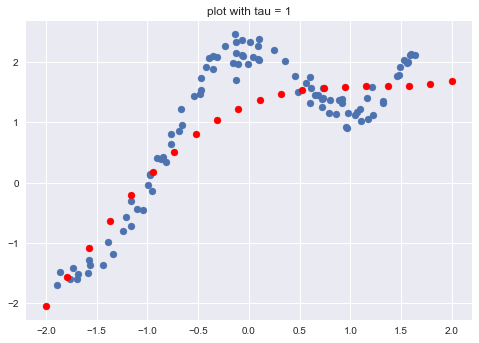

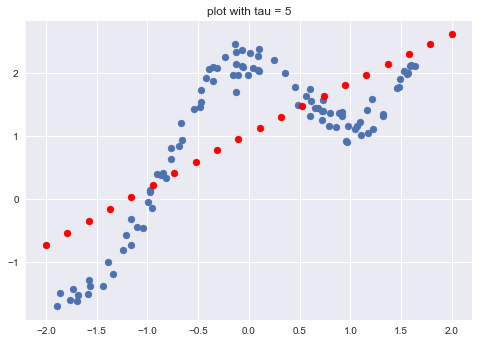

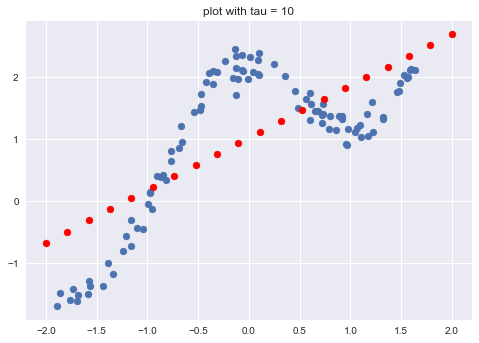

In [54]:
tau = [0.1, 0.5, 1, 5, 10]
for t in tau:
    plotPred(t)